# Understanding Gradient Descent and the effect of Learning Rate on it
- Training a regression model using Pandas and Numpy
 - Defining Hypothesis Function
 - Defining Cost Function
 - Defining Gradient Descent Function
 - Conducting Gradient Descent
- Understanding the effect of Learning Rate on Gradient Descent

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00448/carbon_nanotubes.csv", delimiter=';', nrows=200)

In [3]:
dataset.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [4]:
dataset = dataset.apply(lambda x: (x.str.replace(",",".").astype(float)) if x.dtype==object else x)

In [5]:
X = dataset.iloc[:,:-3].values
Y = dataset.iloc[:,-1].values

## Hypothesis Function
The hypothesis function is the mathematical function that is used to predict the output for a given input data. The parameters of hypothesis functions are represented by $\theta_s$, hence it's often called 'theta function'. For a multivariate linear regression model with 'n' features, the hypothesis function is of the type $h_\theta (x) = \theta_0+\theta_1x_1 + \theta_2x_2+....+\theta_nx_n$.

In [6]:
def theta_function(thetas,x):
  return (thetas[0] + np.matmul(x, thetas[1:]))

## Cost Function
The cost function is used to measure the accuracy of our hypothesis function. The lower the cost function, the better (accurate) is the model. For a linear regression model, the cost function is the average squared difference between the predicted value and the actual value for the entire training dataset.
<br>$J(\theta)$ = $\frac{1}{2m}$ $\sum_{i}^{m}$ $(h_\theta (x)^{(i)} - y^{(i)})^2$

In [7]:
def cost_function(thetas,x,y):
    cost = 0
    
    for i in range(x.shape[0]):
        cost += (theta_function(thetas, x[i]) - y[i])**2

    cost /= (2*x.shape[0])
    return cost

## Gradient Descent Function
As stated earlier, the lower the cost function, the better is the model. For this, we need to optimize the parameters $(\theta_s)$ of our hypothesis function, such that our cost function is minimized.

Now, if there had been just one parameter ($\theta$), we could have taken the derivative of $J(\theta)$ w.r.t. $\theta$ and find the value of $\theta$ where $J'(\theta)$ becomes 0. However, when dealing with multiple parameters it becomes very difficult to find all the values in one go. For this, we use an iterative optimization approach known as __Gradient Descent__.

The main thought in this approach is that, assuming we have certain value of our hypothesis parameters $(\theta_s)$ which gives us some value of cost function, we will change the values of $(\theta_s)$ in such a way that it maximizes the decrease (steepest descent) in our cost function value. Mathematically, it is achieved by finding the slope/gradient ( hence the name *Gradient Descent*) of the cost function at those values of $\theta_s$ and updating the $\theta_s$ based on it. To ensure that the cost function converges, we use a learning rate $(\alpha)$ along with the function gradients. We will discuss about $\alpha$ in later part of this assignment.

$\theta_i'$ := $\theta_i$ - $\alpha$$\frac{d}{d\theta_i}$ $J(\theta)$

$J(\theta)$ = $\frac{1}{2m}$ $\sum_{i}^{m}$ $(h_\theta (x)^{(i)} - y^{(i)})^2$
<br>$\frac{d}{d\theta_i}$ $J(\theta)$ = $\frac{d}{d\theta_i}$ $\frac{1}{2m}$ $\sum_{j}^{m}$ $(h_\theta (x)^{(j)} - y^{(j)})^2$
<br>$\frac{d}{d\theta_i}$ $J(\theta)$ = $\frac{1}{2m}$ $\sum_{j}^{m}$ $\frac{d}{d\theta_i}$ $(h_\theta (x)^{(j)} - y^{(j)})^2$
<br>Using chain rule on it, we get $\frac{d}{d\theta_i}$ $J(\theta)$ = $\frac{1}{m}$ $\sum_{j}^{m}$ $[(h_\theta (x)^{(j)} - y^{(j)})x^{(j)}_i]$

Hence, $\theta_i'$ := $\theta_i$ - $\frac{\alpha}{m}$ $\sum_{j}^{m}$ $[(h_\theta (x)^{(j)} - y^{(j)})x^{(j)}_i]$

In [8]:
def gradient_descent(thetas,x,y,learn_rate):
    derivatives = np.zeros(thetas.shape)
    for i in range(len(x)):
        derivatives[0] += theta_function(thetas,x[i])-y[i]

        for j in range(1,len(derivatives)):
            derivatives[j] += ((theta_function(thetas,x[i])-y[i]) * x[i][j-1])
 
    for i in range(len(derivatives)):
        thetas[i] -= (learn_rate*derivatives[i]/len(x))

One cannot reach the absolute minima of a cost function, this is because as we go near to the absolute minima, the derivatives gets smaller and smaller, and we would need an infinite amount of time to reach the absolute minima. Hence for practical application, we stop our gradient descent after a certain number of iterations, or more commonly, after the change in cost function after subsequent iterations becomes very small.

### Stopping gradient descent after 1000 iterations

In [9]:
thetas = np.zeros(((X.shape[1]+1),1))
for i in range(1000):
    gradient_descent(thetas,X,Y,0.0001)
    
print("The cost (after 1000 iterations):",cost_function(thetas,X,Y)[0].round(4),\
      "\nThe values of thetas: ",thetas.reshape((1,(X.shape[1]+1))))

The cost (after 1000 iterations): 0.0498 
The values of thetas:  [[0.02535464 0.07223225 0.03649357 0.01245117 0.01279784 0.01935605]]


### Stopping gradient descent when the change in $J(\theta)$ after subsequent iterations becomes smaller than 0.0001

In [10]:
thetas = np.zeros(((X.shape[1]+1),1))

prev_cost = np.inf
current_cost = cost_function(thetas,X,Y)[0]

while((prev_cost-current_cost)>0.0001):

    gradient_descent(thetas,X,Y,0.0001)
    
    prev_cost = current_cost
    current_cost = cost_function(thetas,X,Y)[0]  
    
print("The cost (when the descent becomes very small):",current_cost.round(4),\
      "\nThe values of thetas: ",thetas.reshape((1,(X.shape[1]+1))))

The cost (when the descent becomes very small): 0.0808 
The values of thetas:  [[0.01279581 0.03760447 0.01827288 0.00632426 0.0064791  0.0085668 ]]


## Understanding Learning Rate
The learning rate of gradient descent determines how fast or slow does a model converges to (or diverges from) global minima. Hence, it is of significant importance in regression analysis. Let's look at it with the following two figures.

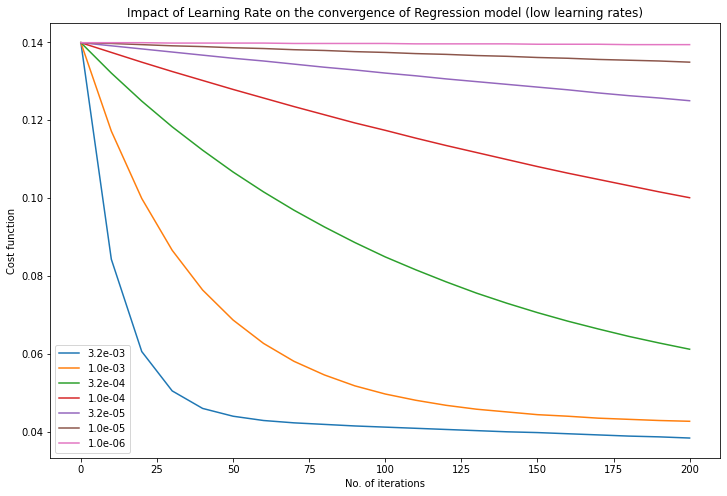

In [16]:
plt.figure(figsize=(12,8))
for j in [10**(-2.5),10**(-3),10**(-3.5),10**(-4),10**(-4.5),10**(-5), 10**(-6)]:
    thetas = np.zeros(((X.shape[1]+1),1))
    cost_vs_iter = []
    
    for i in range(201):
        if(i%10 == 0):
            cost_vs_iter.append(cost_function(thetas,X,Y).round(4))
            
        gradient_descent(thetas,X,Y,j)
    plt.plot([i*10 for i in range(21)],cost_vs_iter, label = '%.1e'%j)

plt.title("Impact of Learning Rate on the convergence of Regression model (low learning rates)")
plt.xlabel("No. of iterations")
plt.ylabel("Cost function")
plt.legend()
plt.show()

In the above figure, we can see that as we are use smaller learning rate, the number of iterations for it to converge to a global minima becomes bigger. This is because for smaller learning rates, the update in values of hypothesis parameter $(\theta)$ will be very small, leading to slow descent towards the global minima. 

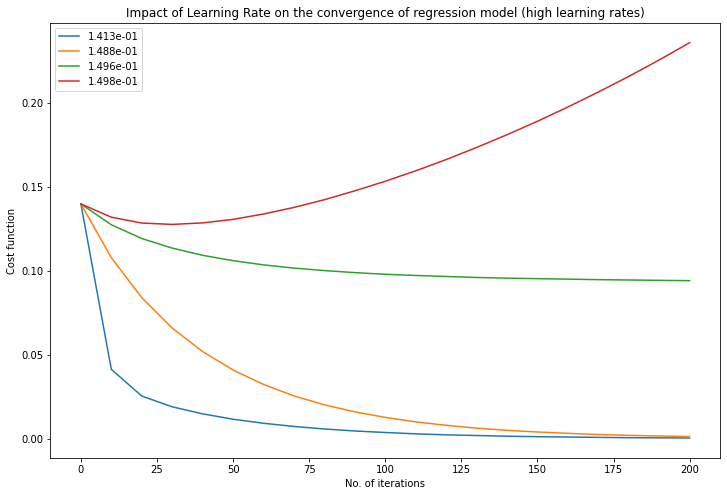

In [36]:
plt.figure(figsize=(12,8))
for j in [10**(-0.85), 10**(-0.8275), 10**(-0.825), 10**(-0.8245)]:
    thetas = np.zeros(((X.shape[1]+1),1))
    cost_vs_iter = []
    
    for i in range(201):
        if(i%10 == 0):
            cost_vs_iter.append(cost_function(thetas,X,Y).round(4))
            
        gradient_descent(thetas,X,Y,j)
    plt.plot([i*10 for i in range(21)],cost_vs_iter, label = '%.3e'%j)

plt.title("Impact of Learning Rate on the convergence of regression model (high learning rates)")
plt.xlabel("No. of iterations")
plt.ylabel("Cost function")
plt.legend()
plt.show()

On the contrary, if we use a higher learning rate, the number of iterations for it to converge, again tends to increase (as shown in the figure below). This is because if the learning rate becomes a bit large, the amount of change might lead the parameters to follow a zig-zag pattern with them crossing (but missing) the global maxima many times. Also for a very large learning rate, the model diverges (as seen for $\alpha$ = $1.498 \times 10^{-0.1}$

Hence, we should choose our learning rate wisely.